# Model performance metrics

* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition Chapter 3 Classification](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch03.html)

How to evaluate the performance of the models using a MNIST handwritten digits classifier.

# Confusion Matrix

## HIV test example

<img align="left" src="./images/confusion_matrix/HIV.png" width="750">  
<img align="left" src="./images/confusion_matrix/APR.png" width="750">  

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

Using hand-written images (MNSIT), explore the performance metrics of classifiers. 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
# MNIST dataset is a dictonary where each key identifies the type of data.
mnist.keys()

In [4]:
# DESCR refers to the explanation of the data set
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# 'target' refers to the labels (digit of the handwritten image) and the 1st image is digit '5'.
# Convert character digit to int for ML.
mnist['target'] = mnist['target'].astype(np.int)
print(mnist['target'][:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
# 'data' refers to an array of the hand-written images (70,000 images).
mnist['data'].shape

(70000, 784)

In [7]:
# Each image is 28 x 28 black & white bitmap.
mnist['data'][0].shape

(784,)

In [8]:
# 'feature_names' refers to description of each column of the image data e.g. mnist['data'][0].
#mnist['feature_names']

## Train and test data sets
MNIST data has been already shuffled, hence no need to shuffle.

In [9]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
# Create a binary classifier labels (digit5 or not)
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)
print(y_train_5[:10])

[ True False False False False False False False False False]


# How to evaluate the model performance

## Considerations

## Value proposition

Identify what is the most important value of the model. Evaluation depends on the value to be achieved by the model.

### When FN(False Negative) is bad &rarr; Recall 

For HIV, help HIV patients. The value of the model is to be able to catch those who have HIV. FN is the worst thing to happen because they will die. Therefore, reduce FN &rarr; better Recall is the metric for better model.

For hand-written digit classifier for an insurance company to process the hand-written claim to identify the cost, postal code, the precision matters because FP can cause damanges. For instance, if 9000 is classified 0000 (FP), it will cause a loss and reputation damage of the business. FN may increase, but if a number cannot be identified, still manuall process can take over.

### When FP(False Positive) is bad &rarr; Precision 

For mining, if exploration of a potential mine site is predicted profitable but it is not actually, the company will waste the huge money. Therefore, reduce FP &rarr; better Precision is the metric for better model. FN would incur opportunity loss, but it will not cause the real damage which FP will cause.


## Avoid using test dataset
Knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance, because the parameters (e.g. C hyper parameter for SVM) can be tweaked until the estimator performs optimally by the modeller. Preserve the test set until the last moment.

### Cross validation
In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using k−1 of the folds as training data. The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

[Scikit-Learn Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html) provides the cross validation and model evaluation functions.

* [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) 
* [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

See [3.3. Model evaluation: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring) for available scoring methods.

# Evaluating SGD Classifier

In [11]:
# Linear logistic SGD classifier (default SVM) 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier
#  Set the random_state to have reproducible results
sgd = SGDClassifier(random_state=None)
sgd.fit(X=X_train, y=y_train_5)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Train SGD classifier
Train model that identifies if the image is 5 or not.

## Confusion Matrix

[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) provides the way to visualize the confusion matrix.

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sgd = cross_val_predict(sgd, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred_sgd)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGD

array([[52691,  1888],
       [ 1230,  4191]])

The first row of this matrix considers non-5 images (the negative class): Approx 50K of them were correctly classified as non-5s (they are called true negatives), while the remaining were wrongly classified as 5s (false positives). <BR><br>
The second row considers the images of 5s (the positive class): Approx 1,325 were wrongly classified as non-5s (false negatives), while the remaining approx 4,096 were correctly classified as 5s (true positives). 

<img align="left" src="./images/confusion_matrix/CM.MNIST.png" width="500">

## Precision / Recall Tradeoff
Although the outcome of a binary classifier is 1/0, there is a threshold value in the classifier as the calculation value is not a continous number. To get more precision (less FP), threshold can be higher and it will increase FN hence less Recall, hence there is a trade-off

<img align="left" src="./images/confusion_matrix/PR_TradeOff.png" width="750">

## Precision Recall Curve
To verify the trade-off between Precision and Recall, utilize Scikit Learn functions.

* [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
* [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

* [3.3. Model evaluation: quantifying the quality of predictions - 3.3.2.8. Precision, recall and F-measures](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)

<q>
The precision_recall_curve computes a precision-recall curve from the ground truth label and a score given by the classifier by varying a decision threshold.
</q>

In [13]:
# The return value of the cross_val_predict function depends on the method specified.
# For SGDClassifier method, 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# Example method available:
# - predict: Predict class labels for samples
# - decision_function: Predict confidence scores for samples
# Get the confidence score of the SGD classifier predictions.
y_scores_sgd = cross_val_predict(
    sgd, 
    X_train, 
    y_train_5, 
    cv=3,
    method="decision_function" # Available methods depend on the classifier
)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGD

In [14]:
print(np.max(y_scores_sgd))
print(np.min(y_scores_sgd))

943404.2248558549
-3225436.1330187004


In [15]:
from sklearn.metrics import precision_recall_curve
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_5, y_scores_sgd)

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds_sgd, precisions_sgd[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds_sgd, recalls_sgd[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([np.min(y_scores_sgd) / 2, np.max(y_scores_sgd), 0, 1])             # Not shown

Saving figure precision_recall_vs_threshold_plot_sgd


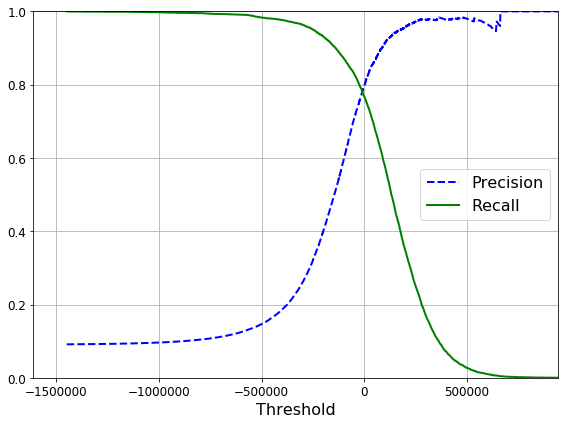

In [39]:
plt.figure(figsize=(8, 6))                      # Not shown
plot_precision_recall_vs_threshold(precisions_sgd, recalls_sgd, thresholds_sgd)

save_fig("precision_recall_vs_threshold_plot_sgd")  # Not shown
plt.show()

In [18]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls_sgd, precisions_sgd, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

Saving figure precision_vs_recall_plot_sgd


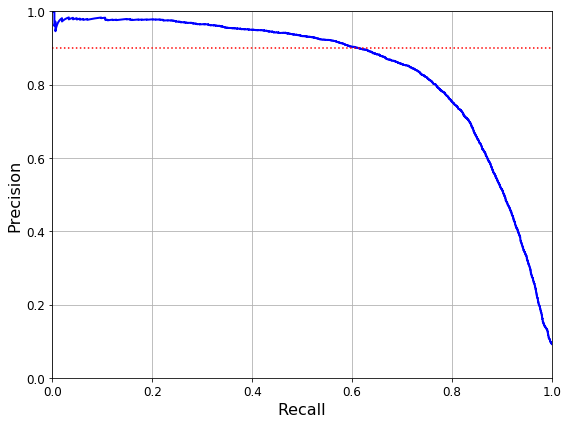

In [19]:
# 90% precision 
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_sgd, recalls_sgd)
plt.plot([0.0, 1.0], [0.9, 0.9], "r:")
save_fig("precision_vs_recall_plot_sgd")
plt.show()

Precision falls sharply around 60% recall. Adjust a precision/recall trade-off depending on the value that the model should bring about.

## ROC (Receiver Operating Characteristic)

<img align="left" width="300" src="./images/confusion_matrix/TPR.png"><br />  
<img align="left" width="300" src="./images/confusion_matrix/FPR.png"><br />  
<img align="left" width="750" src="./images/confusion_matrix/TPR_FPR_Tradeoff.png"><br />  

### ROC and AUC (Area Under Curve)
If the model is perfect (TPR=100%, FPR=0%), the curve covers entire area which integrates to 1. The higer AUC is, the better the model is.

In [20]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
fpr_sgd, tpr_sgd, thresholds = roc_curve(y_train_5, y_scores_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

In [32]:
def plot_roc_curve(fpr, tpr, roc_auc, title='Receiver operating characteristic'):
    plt.plot(
    fpr, 
    tpr, 
    color='darkorange',
    lw=2, 
    label='ROC curve (area = %0.3f)' % roc_auc)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

Saving figure roc_curve_plot_sgd


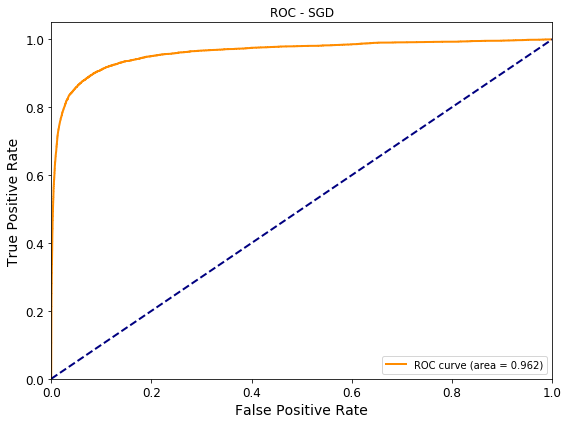

In [33]:
plt.figure(figsize=(8, 6))
plot_roc_curve(
    fpr_sgd, 
    tpr_sgd, 
    roc_auc_sgd,
    title='ROC - SGD'
)
save_fig("roc_curve_plot_sgd") 
plt.show()

## Evaluation scores

In [23]:
from sklearn.model_selection import cross_validate
scorings=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results_sgd = cross_validate(sgd, X=X_train, y=y_train_5, cv=3, scoring=scorings)
results_sgd.keys()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGD

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1', 'test_roc_auc', 'train_roc_auc'])

In [24]:
import pandas as pd
data = [
    np.append(["Accuracy"], results_sgd['test_accuracy']),
    np.append(["Precision"], results_sgd['test_precision']),
    np.append(["Recall"], results_sgd['test_recall']),
    np.append(["F1"], results_sgd['test_f1']),
    np.append(["ROC_AUC"], results_sgd['test_roc_auc'])
]
pd.DataFrame(data, columns=["Score","1st", "2nd", "3rd" ])

,Score,1st,2nd,3rd
0,Accuracy,0.954,0.95525,0.84005
1,Precision,0.7192288680177954,0.9681724845995893,0.3550603915035402
2,Recall,0.805201992252352,0.5218594355285002,0.9435528500276702
3,F1,0.7597911227154048,0.6781733189500179,0.5159630806476018
4,ROC_AUC,0.9675933971332588,0.9603478365509142,0.9622141016368458


# Evaluating Random Forest Classifier

Scikit Learn RandomForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method. Scikit-Learn classifiers generally have one or the other, or both. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

rf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_rf = cross_val_predict(
    rf, 
    X_train, 
    y_train_5, 
    cv=3,
    method="predict_proba"
)
y_scores_rf = y_probas_rf[:, 1]   # score = proba of positive class

## Confusion Matrix

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred_rf = cross_val_predict(rf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred_rf)

array([[54534,    45],
       [  725,  4696]])

## Precision Recall Curve

Saving figure precision_recall_vs_threshold_plot_rf


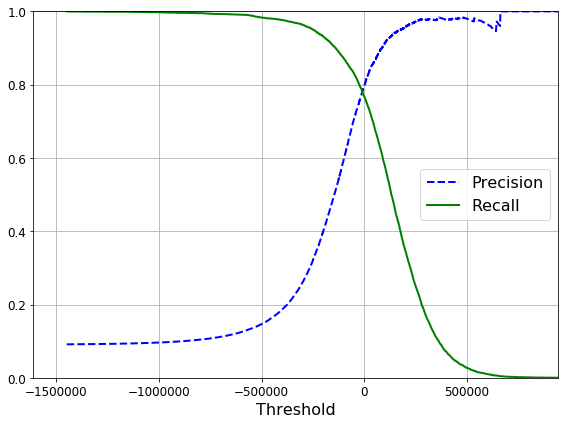

In [38]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_5, y_scores_rf)

plt.figure(figsize=(8, 6))                      
plot_precision_recall_vs_threshold(
    precisions_rf, 
    recalls_rf, 
    thresholds_rf
)

save_fig("precision_recall_vs_threshold_plot_rf")
plt.show()

Saving figure precision_vs_recall_plot_rf


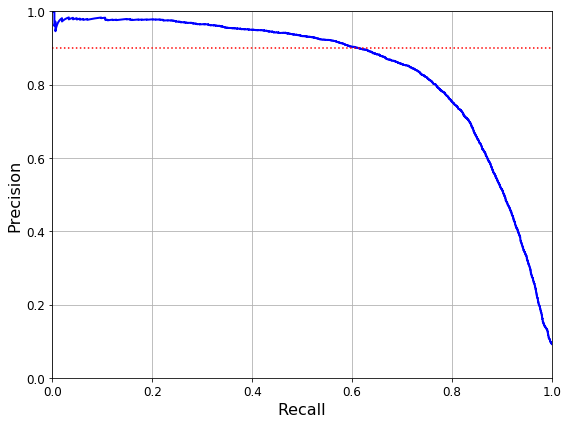

In [28]:
# 90% precision 
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_rf, precisions_rf)
plt.plot([0.0, 1.0], [0.9, 0.9], "r:")

save_fig("precision_vs_recall_plot_rf")
plt.show()

## ROC and AUC

In [29]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5,y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Saving figure roc_curve_plot_rf


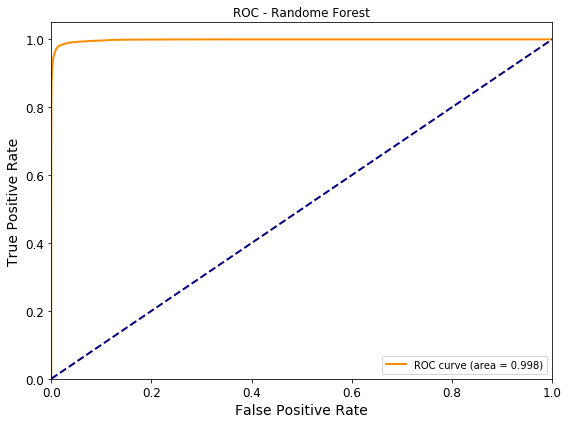

In [34]:
plt.figure(figsize=(8, 6))
plot_roc_curve(
    fpr_rf, 
    tpr_rf, 
    roc_auc_rf,
    'ROC - Randome Forest'
)
save_fig("roc_curve_plot_rf") 
plt.show()

## Evaluation Scores

In [ ]:
from sklearn.model_selection import cross_validate
scorings=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results_rf = cross_validate(rf, X=X_train, y=y_train_5, cv=3, scoring=scorings)
results_rf.keys()

In [ ]:
import pandas as pd
data = [
    np.append(["Accuracy"], results_rf['test_accuracy']),
    np.append(["Precision"], results_rf['test_precision']),
    np.append(["Recall"], results_rf['test_recall']),
    np.append(["F1"], results_rf['test_f1']),
    np.append(["ROC_AUC"], results_rf['test_roc_auc'])
]
pd.DataFrame(data, columns=["Score","1st", "2nd", "3rd" ])